In [1]:
import torchvision.transforms as transforms
from torch.utils.data import random_split, DataLoader
import torch
import matplotlib.pyplot as plt

from datasets.cityscapes import setupDatasetsAndLoaders
from utils import convertColour

print(torch.__version__)

1.8.1+cu102


## Display Ground Truth Labels and Original Samples

In [2]:
inv_normalize = transforms.Normalize(
   mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
   std=[1/0.229, 1/0.224, 1/0.225]
)


image name: ('ulm_000013_000019_leftImg8bit',)
image tensor size: torch.Size([3, 224, 448])


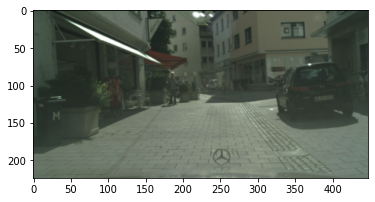

annotated output tensor size: torch.Size([224, 448])


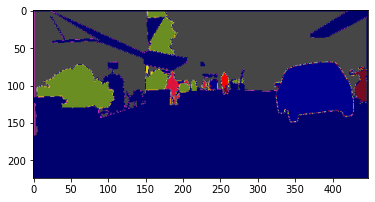


image name: ('munster_000016_000019_leftImg8bit',)
image tensor size: torch.Size([3, 224, 448])


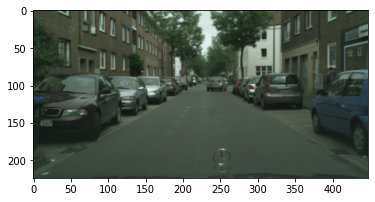

annotated output tensor size: torch.Size([224, 448])


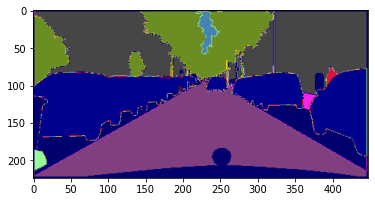


image name: ('ulm_000051_000019_leftImg8bit',)
image tensor size: torch.Size([3, 224, 448])


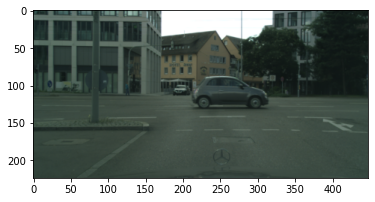

annotated output tensor size: torch.Size([224, 448])


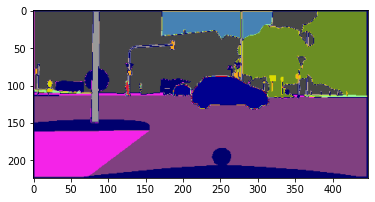


image name: ('ulm_000034_000019_leftImg8bit',)
image tensor size: torch.Size([3, 224, 448])


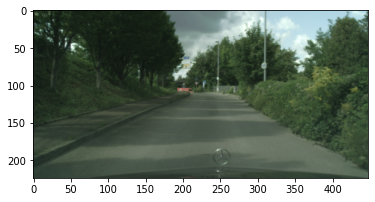

annotated output tensor size: torch.Size([224, 448])


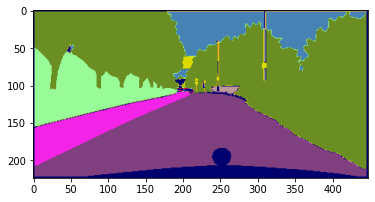

In [3]:
train_set, val_set, test_set, train_loader, val_loader, test_loader = setupDatasetsAndLoaders('./data', batch_size=1)

for idx, sample in enumerate(train_loader):
    imgSeq, annotatedOutput, imgName = sample
    print('')
    print(f'image name: {imgName}')
    print(f'image tensor size: {imgSeq[-1][0].shape}')
    img = transforms.ToPILImage()(inv_normalize(imgSeq[-1][0]))
    plt.imshow(img)
    plt.show()

    print(f'annotated output tensor size: {annotatedOutput[0].shape}')
    out = convertColour(annotatedOutput[0], annotatedOutput[0])
    plt.imshow(out)
    plt.show()
    
    if idx >= 3:
        break



## Display Loss and IOU Graphs of training

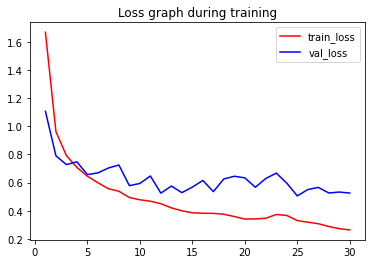

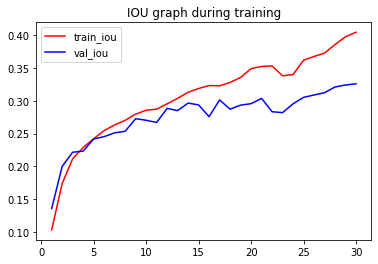

In [4]:
model_path = 'Models/B4L0.001adam_psp/batch_4_lr_0.001_e_29_optimizer_adam_psp.pt'

def show_graphs(model_path):
    cp = torch.load(model_path)
    train_loss = cp['loss_list']
    val_loss = cp['val_loss_list']
    train_iou = cp['train_iou']
    val_iou = cp['val_iou']

    n = len(train_loss)
    ran = range(1, n+1)

    plt.plot(ran, train_loss, 'r', label='train_loss')
    plt.plot(ran, val_loss, 'b', label='val_loss')
    plt.title('Loss graph during training')
    plt.legend()
    plt.show()

    plt.plot(ran, train_iou, 'r', label='train_iou')
    plt.plot(ran, val_iou, 'b', label='val_iou')
    plt.title('IOU graph during training')
    plt.legend()
    plt.show()

show_graphs(model_path)

## Training the Model

In [5]:
from train import hyperparams_train, train

# train(num_epochs=1, use_psp=True, batch_size=4, lr=0.001, optimizer_name="adam")

## Testing the Trained Model
Aside from the validation dataset used for validation during the training process, we are able to test a trained model using a test dataset as well by calling the `evaluate` method.

Alternatively, we can also visualize the predicted labelled image from a trained model as well using the `predict` method, which is implemented in the GUI. 

In [6]:
from predict import evaluate, predict, retrieve_sequence

# evaluate('./data', 'Models/B4L0.001adam_psp/batch_4_lr_0.001_e_29_optimizer_adam_psp.pt', batch_size=1, gpu=True)

## Hyperparameters Tuning
Due to this method taking extremely long to run, we have commented it out in case of accidents. 

In [7]:
# hyperparams_train(optimizer = "adam",use_psp= True)
